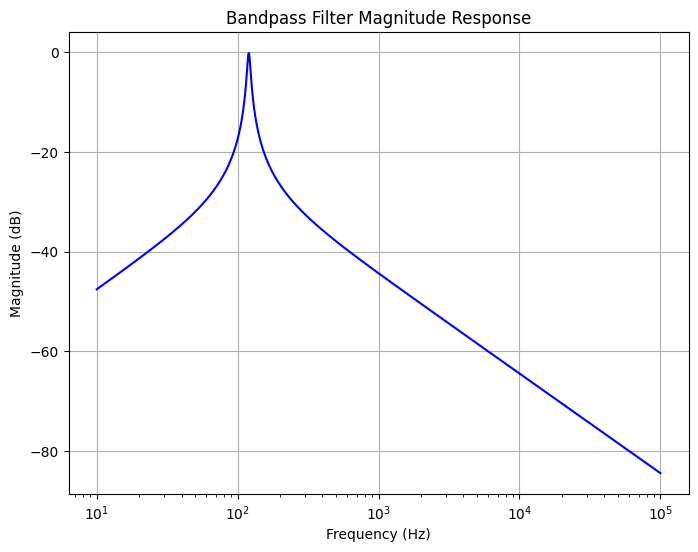

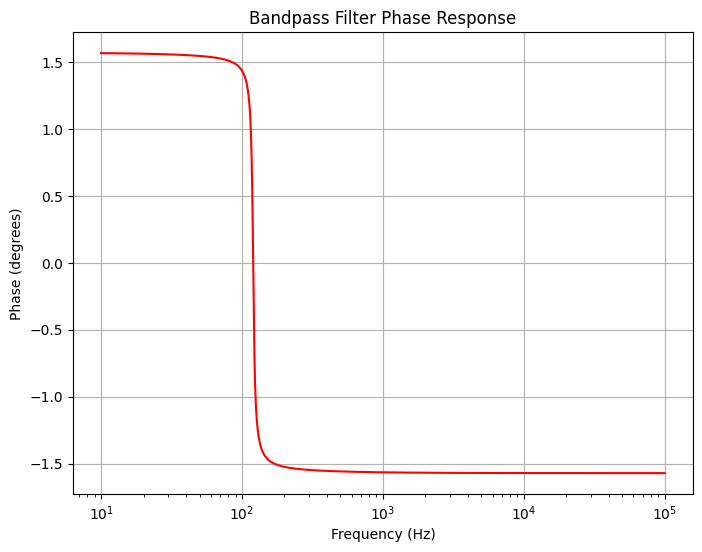

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Parameters
K0 = 1.0       # Overall gain
fc = 120.0    # Center frequency in Hz
Q  = 20.0       # Quality factor

# Define numerator and denominator of the transfer function H(s)
b0 = K0 * (2 * np.pi * fc) / Q
num = [b0, 0]
den = [1, (2 * np.pi * fc)/Q, (2 * np.pi * fc)**2]

f_min = 10      # 10 Hz
f_max = 1e5     # 100 kHz
num_points = 1000
f = np.logspace(np.log10(f_min), np.log10(f_max), num_points)  # in Hz

# Convert f (Hz) to w (rad/s)
w = 2 * np.pi * f

# Use freqs to get the frequency response
w, H = freqs(num, den, w)

mag_db = 20 * np.log10(np.abs(H))
phase_deg = np.angle(H, deg=False)

plt.figure(figsize=(8, 6))
plt.semilogx(f, mag_db, 'b')
plt.title('Bandpass Filter Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.figure(figsize=(8, 6))
plt.semilogx(f, phase_deg, 'r')
plt.title('Bandpass Filter Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.show()


# Calculate filter coefficients

Digital numerator coefficients (b): [ 0.00098041  0.         -0.00098041]
Digital denominator coefficients (a): [ 1.         -1.99649917  0.99803919]
Code: feedbackFilter2.setCoefficients(-1.9964991655217423, 0.9980391855721439, 0.0009804072139280653, 0.0, -0.0009804072139280653);


/var/folders/lg/9twk84311llgwk38_815qyv80000gp/T/ipykernel_3053/2108305083.py:18: RuntimeWarning: divide by zero encountered in log10
  magnitude_dB = 20 * np.log10(np.abs(h))


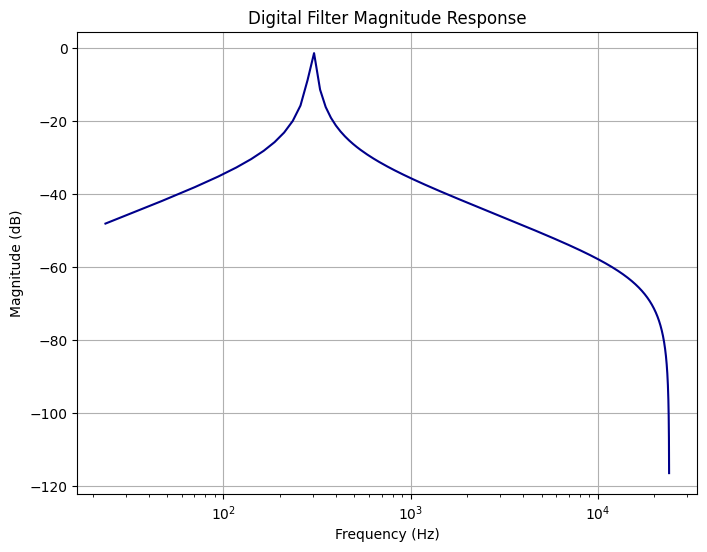

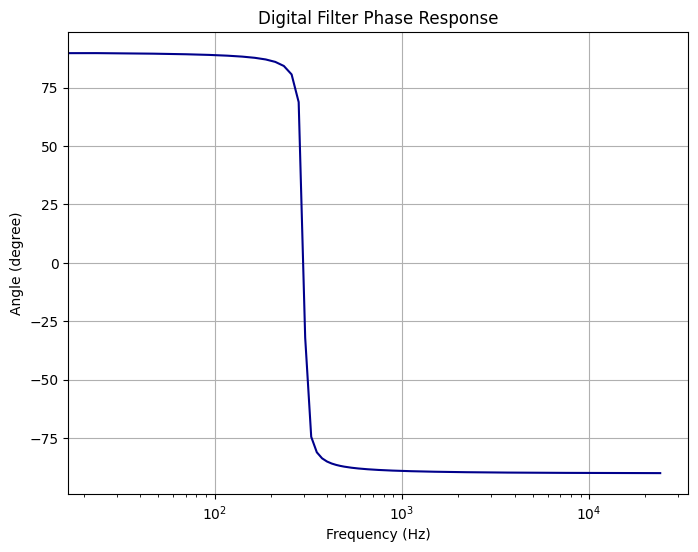

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, bilinear

K0 = 1.0       # Gain
fc = 300    # Center frequency in Hz
Q  =20.0       # Quality factor
fs = 48000.0   # Sampling frequency in Hz

b_analog = [K0 * (2 * np.pi * fc) / Q, 0]
a_analog = [1, (2 * np.pi * fc) / Q, (2 * np.pi * fc)**2]

b_digital, a_digital = bilinear(b_analog, a_analog, fs)
w, h = freqz(b_digital, a_digital, worN=1024)
f = w * fs / (2 * np.pi)

magnitude_dB = 20 * np.log10(np.abs(h))
phase_rad = np.angle(h, deg=True)

print("Digital numerator coefficients (b):", b_digital)
print("Digital denominator coefficients (a):", a_digital)
print(f"Code: feedbackFilter2.setCoefficients({a_digital[1]}, {a_digital[2]}, {b_digital[0]}, {b_digital[1]}, {b_digital[2]});")

plt.figure(figsize=(8, 6))
plt.semilogx(f, magnitude_dB, 'darkblue')
plt.title('Digital Filter Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.figure(figsize=(8, 6))
plt.semilogx(f, phase_rad, 'darkblue')
plt.title('Digital Filter Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Angle (degree)')
plt.grid(True)

plt.show()
